In [50]:
import numpy as np
import pandas as pd
from geopy.distance import geodesic
import glob 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [51]:
def connectcsv(files_path):
    dfs = []
    for file in files_path:
        df = pd.read_csv(file)
        selected_columns = ['ride_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng','member_casual']
        df = df[selected_columns]
        df = df.dropna()
        df['start_lat'] = df['start_lat'].astype('float64')
        df['start_lng'] = df['start_lng'].astype('float64')
        df['end_lat'] = df['end_lat'].astype('float64')
        df['end_lng'] = df['end_lng'].astype('float64')
        #encode member_casual column
        df['member_casual'] = df['member_casual'].map({'member': 0, 'casual': 1})
        df = df.sample(n=1000)
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

In [52]:
def calculate_distance(row):
    start_coords = (row['start_lat'], row['start_lng'])
    end_coords = (row['end_lat'], row['end_lng'])
    return geodesic(start_coords, end_coords).miles

In [53]:
data_2020 = connectcsv(sorted(glob.glob('../Data/part2/2020*.csv')))
data_2020['distance_miles'] = data_2020.apply(calculate_distance, axis=1)
data_2020

,ride_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance_miles
0,9371A19B65E21CCC,38.899983,-76.991383,38.886952,-76.996806,0,0.945230
1,4E428333CF675583,38.889600,-76.976900,38.888774,-77.028694,0,2.792848
2,AB25B7E0EA247437,38.890496,-77.017247,38.884120,-77.017445,0,0.439949
3,775A4A9EA22A9157,38.884323,-77.026010,38.884323,-77.026010,1,0.000000
4,A46CA76F3FAF9A9C,38.894972,-77.003135,38.910100,-77.044400,0,2.456855
...,...,...,...,...,...,...,...
8995,733625F2E52CC1B0,38.909802,-77.034385,38.928629,-77.032236,1,1.303868
8996,7F3A285CA3D3DE76,38.917622,-77.015970,38.917764,-77.032096,0,0.869077
8997,622012220A8B9193,38.876664,-77.000450,38.890583,-77.049296,0,2.803107
8998,0E715DB4E534B8F8,38.905737,-77.022270,38.876697,-77.017898,0,2.017016


In [54]:
data_2021 = connectcsv(sorted(glob.glob('../Data/part2/2021*.csv')))
data_2021['distance_miles'] = data_2021.apply(calculate_distance, axis=1)
data_2021.head()

/var/folders/px/bhxss9d10zs_wzsv0ck6sb200000gn/T/ipykernel_68531/162341129.py:4: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


,ride_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance_miles
0,6F2CB7E9BB37E60E,38.931900,-77.038800,38.908490,-77.063586,1,2.095637
1,53F7968D47D9C6C5,38.884331,-76.994731,38.879231,-76.995322,0,0.353205
2,F8C72FE2BF0DB47C,38.912630,-76.971923,38.900412,-77.001949,1,1.824649
3,B3B84174C642226B,38.931952,-77.038770,38.930000,-77.040000,0,0.150086
4,6F9A5786B85BC32C,38.914751,-77.003560,38.908643,-77.012365,0,0.634595


In [55]:
data_2022 = connectcsv(sorted(glob.glob('../Data/part2/2022*.csv')))
data_2022['distance_miles'] = data_2022.apply(calculate_distance, axis=1)
data_2022.head()

,ride_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance_miles
0,256C646A3433E528,38.951596,-77.012808,38.952369,-77.002721,0,0.545932
1,25FBD944B76D9A8E,38.896226,-76.992786,38.884095,-76.995234,0,0.847145
2,45A9DDA5ACBADC5F,38.889908,-76.983326,38.889908,-76.983326,1,0.000000
3,BE581609D768DEA6,38.902446,-77.015890,38.902406,-77.016006,0,0.006793
4,DC59373A43D280BF,38.915544,-77.038252,38.900711,-77.046449,0,1.114510


In [56]:
combined_df = pd.concat([data_2020, data_2021, data_2022], ignore_index=True)
combined_df.head()

,ride_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance_miles
0,9371A19B65E21CCC,38.899983,-76.991383,38.886952,-76.996806,0,0.945230
1,4E428333CF675583,38.889600,-76.976900,38.888774,-77.028694,0,2.792848
2,AB25B7E0EA247437,38.890496,-77.017247,38.884120,-77.017445,0,0.439949
3,775A4A9EA22A9157,38.884323,-77.026010,38.884323,-77.026010,1,0.000000
4,A46CA76F3FAF9A9C,38.894972,-77.003135,38.910100,-77.044400,0,2.456855


## Random Forest Classifier

Accuracy: 0.6210606060606061
              precision    recall  f1-score   support

           0       0.66      0.73      0.69      3837
           1       0.56      0.48      0.51      2763

    accuracy                           0.62      6600
   macro avg       0.61      0.60      0.60      6600
weighted avg       0.61      0.62      0.62      6600



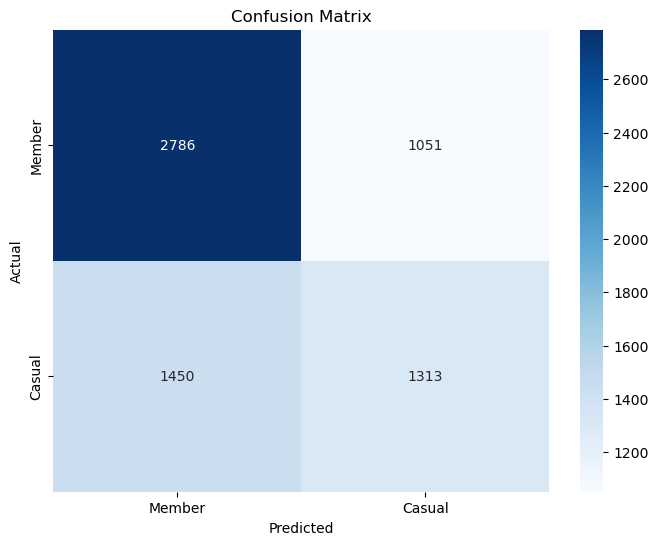

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Selecting the relevant features and the target variable
features = combined_df[['start_lat', 'start_lng', 'end_lat', 'end_lng', 'distance_miles']]
target = combined_df['member_casual']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Creating and training the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting the test set results
y_pred = rf_model.predict(X_test)

# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Generating a classification report
class_report = classification_report(y_test, y_pred)
print(class_report)

# Creating a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', 
            xticklabels=['Member', 'Casual'], 
            yticklabels=['Member', 'Casual'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

## Decision Tree Classifier

In [62]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Load the Iris dataset
X = combined_df[['distance_miles', 'start_lat', 'start_lng', 'end_lat', 'end_lng']]
y = combined_df['member_casual']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate the classifier
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Optional: Visualize the decision tree
# Requires additional installation: pip install graphviz
# from sklearn.tree import export_graphviz
# import graphviz
# dot_data = export_graphviz(clf, out_file=None, 
#                            feature_names=iris.feature_names,  
#                            class_names=iris.target_names,  
#                            filled=True, rounded=True,  
#                            special_characters=True)  
# graph = graphviz.Source(dot_data)  
# graph.render("iris") 


[[3983 1797]
 [2148 1972]]
              precision    recall  f1-score   support

           0       0.65      0.69      0.67      5780
           1       0.52      0.48      0.50      4120

    accuracy                           0.60      9900
   macro avg       0.59      0.58      0.58      9900
weighted avg       0.60      0.60      0.60      9900

